In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
from IPython import display
from sklearn.base import BaseEstimator

# Convolutional neural networks

Feedforward neural networks are general and can be applied to a variaty of data, but when we apply them for images they don't have any knowledge that the input given to them is an image. In fact, for instance, we could swap the pixels of an image randomly and this will not change anything at all to 
the results obtained with a feedforward neural network.

In [2]:
from skimage.data import lena
from IPython.display import Image

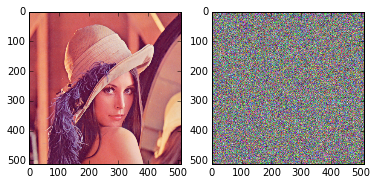

In [3]:
img = lena()
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
img_vectorized = img.flatten().copy()
np.random.shuffle(img_vectorized)
img_vectorized_reshaped = img_vectorized.reshape(img.shape)
plt.imshow(img_vectorized_reshaped)

**These two images are the same for a standard feedforward neural network !**

**Convolutional networks** are a constrained version of standard feed forward neural networks where we encode a prior on the data using a specific architecture. 

So contrary to standard feed forward neural networks, **convolutional networks** takes into account that the inputs are images by using a different constrained architecture which is turns out to be very efficient.

In feed forward neural networks, layers are organized into a **vector** of units while in **convolutional networks** they are organized into a **tensor** of 3 dimensions, one for **width**, one for **height** and one for **depth**.

**Standard neural net ** :

![http://cs231n.github.io/assets/nn1/neural_net2.jpeg](http://cs231n.github.io/assets/nn1/neural_net2.jpeg)

**Convolutional neural net**:

![http://cs231n.github.io/assets/cnn/cnn.jpeg](http://cs231n.github.io/assets/cnn/cnn.jpeg)

Source : http://cs231n.github.io/convolutional-networks/

Two key ideas of **convolutional networks** :
    - Sparse connectivity : unit are only connected to a subset of units in previous layer
    - Weight sharing : weights are shared, different units use the same weights.


**Sparse connectivity** :

![sparse connectivity](http://deeplearning.net/tutorial/_images/sparse_1D_nn.png)

**Weight sharing**

![weight sharing](http://deeplearning.net/tutorial/_images/conv_1D_nn.png)

Source : [http://deeplearning.net/tutorial/lenet.html](http://deeplearning.net/tutorial/lenet.html)

The basic building blocks of **convolutional networks** are **convolutional layers** (usually followed by a **non-linear activation function**) and **pooling layers**

## Convolutional layers

In each **convolutional layer**, we have a set **filters** and we perform a
discrete convolution operation of the input using this set filters,
then we obtain a set of new reduced size images which we also
call **feature maps**. 

The convolution operation is used extensively in image processing to 
perform various operations like edge detection, blurring, etc. 

The same concept is used in **convolutional layers**, but the filters are 
not pre-defined and fixed like in image processing, 
they are rather learned from data.

![http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif](http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif)

Source : http://deeplearning.stanford.edu/tutorial/

Another nice visualization **convolutional layers** : http://cs231n.github.io/convolutional-networks/

Convolutions are useful because they allow weight sharing (same filter is applied everywhere), this reduce the number of parameters by a big amount (compared to standard feed forward neural networks) which is good for regularization. 

Additionnally, as the filter is applied everywhere, we are expecting that the filter will be useful in different locations, which makes sense if an object that the filter detects (for instance it makes sense for an edge detector) can appear everywhere in the image

Each convolutional layer (standard setup) takes as 

- **input I** a 3D tensor **(input_depth, input_width, input_height)**
- has a set of **filters** **F** defined as 4D tensor **(number_of_filters, input_depth, filter_width, filter_height)**
- applies a discrete convolution operation which returns a 3D tensor **O** of size **(number_of_filters, input_width - filter_height + 1, input_height - filter_height + 1)**


- We also we have a bias term for each filter (shared across all locations)
- We apply a non-linearity after computing the output (typically **ReLU** and its variants)
- Convolutional layers can also do **padding**, adding zeros in the borders of the image
- Convolutional layers may also have a **stride** different than 1, the **stride***  defines the "step size" of the filter for each dimension when applied to the input.

 $$O_f(i, j) = \sum_{d=1}^{D} \sum_{y=1}^{H} \sum_{x=1}^{W} I_d(x + i - 1, y + j - 1)F_{d, f}(x, y)$$
 
**D** : input depth
 
**W** : filters width
 
**H** : filters height

**f** : index of output feature map

**i, j** : indices of width and height of output feature map

## Pooling layers

The purpose of **pooling layers** is to reduce the size of the input  by 
a certain ratio by taking non-overlapping parts (at least in standard pooling layers) 
of the input, meaning we divide the input into a grid, and then we compute some average
in each block in that grid.

Applying pooling layers reduce the size of the input image by a certain
ratio, usually **2** is used. 
But this dimensionality reduction comes with a price : we loose some information about
the exact position of the features. 

But it turns out that this can be helpful in the context of prediction,
first it helps to reduce memory and computational power required
in subsequent layers,  and losing the exact position of the features
give us some translation invariance. 

Note that pooling layers do not have learnable paramters, they only have hyper-parameters.
The **stride** (for each dimension) defines the ratio by which we subsample, if it is **2** for both width and height dimensions we divide the size of the image by 2.

The most widely used averaging operation is the **max** because it works
well in practice, that layer is called a **max-pooling** layer.


**Max pooling** :

$$O_d(i, j) = max_{1  \leqslant x \leqslant W, 1  \leqslant y \leqslant H} (I_d(x + i - 1, y + j - 1))$$

**I** : input 

**d** : indices of input depth
 
$W = I_w / S_w$ : width of the grid, where $I_w$ is the width of the input and $S_w$ the stride of the width dimension

$H = I_h / S_h$ : height of the grid, where $I_h$ is the height of the input and $S_h$ the stride of the height dimension
**i, j** : indices of width and height

## Deep convolutional networks


The basic "vanilla" convnet is a series of convolution + pooling layers, ending by a set of fully connected layers, and an output layer.

Modern convolutional architectures are usually very deep, for instance in
(Very Deep Convolutional Networks for Large-Scale Image Recognition, Karen Simonyan, Andrew Zisserman) there are up to 19 layers, without counting pooling layers in.


There have been a lot of work on visualizing what is learned by deep convolutional networks and they really seem to learn more abstractions as we go more deeply.
One example here : http://yosinski.com/static/proj/deepvis_all_layers.jpg, you can see that complexity/asbtraction increases as we go more deeply. This is done by finding inputs which maximizes the units in the deep network.

Another example of the filters of the first convolution layer: 
![](http://cs231n.github.io/assets/cnn/weights.jpeg) 

from (Imagenet classification with deep convolutional neural networks, Alex Krizhevsky et al.).



Let's try to use convolutional layers in NoLearn !

In [4]:
import os
os.environ["THEANO_FLAGS"] = "device=gpu" # to tell theano to use a GPU :)
import theano

Using gpu device 1: Tesla K20Xm (CNMeM is disabled)


In [5]:
data = np.load("train_64x64.npz")

In [6]:
X, y = data["X"], data["y"]

In [7]:
X = X.astype(np.float32) # For GPUs, theano excpects float32 inputs

In [8]:
X = X.transpose((0, 3, 1, 2)) # nolearn expects depth to be second dimension

In [9]:
X = X / 255.

In [10]:
from nolearn.lasagne import NeuralNet, BatchIterator
from lasagne import layers, nonlinearities, updates, init, objectives
from nolearn.lasagne.handlers import EarlyStopping

In [11]:
net = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('hidden3', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 3, 64, 64), # 3 = depth of input layer (color), 64x64 image
    use_label_encoder=True,
    verbose=1,

    conv1_num_filters=64, conv1_filter_size=(5, 5), pool1_pool_size=(2, 2),
    conv2_num_filters=128, conv2_filter_size=(5, 5), pool2_pool_size=(2, 2),
    hidden3_num_units=200,
    output_num_units=18, output_nonlinearity=nonlinearities.softmax,
    update_learning_rate=0.01,
    max_epochs=200,
    on_epoch_finished = [EarlyStopping(patience=10, criterion='valid_accuracy', 
                                       criterion_smaller_is_better=False)]

)

In [12]:
net.fit(X, y)

# Neural Network with 4540010 learnable parameters

## Layer information

  #  name     size
---  -------  ---------
  0  input    3x64x64
  1  conv1    64x60x60
  2  pool1    64x30x30
  3  conv2    128x26x26
  4  pool2    128x13x13
  5  hidden3  200
  6  output   18

  epoch    train loss    valid loss    train/val    train_acc    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----------  ------
      1       2.45541       2.40844      1.01950      0.29557      0.31797  17.70s
      2       2.30381       2.26746      1.01603      0.34349      0.35558  17.61s
      3       2.18164       2.18007      1.00072      0.36252      0.36514  17.53s
      4       2.09662       2.19877      0.95354      0.37486      0.37002  17.47s
      5       2.07093       2.21242      0.93605      0.37843      0.36620  17.44s


NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7fc779a24250>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7fc779a241d0>,
     conv1_filter_size=(5, 5), conv1_num_filters=64,
     conv2_filter_size=(5, 5), conv2_num_filters=128, custom_score=None,
     hidden3_num_units=200, input_shape=(None, 3, 64, 64),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('conv1', <class 'lasagne.layers.conv.Conv2DLayer'>), ('pool1', <class 'lasagne.layers.pool.MaxPool2DLayer'>), ('conv2', <class 'lasagne.layers.conv.Conv2DLayer'>), ('pool2', <class 'lasagne.layers.pool.MaxPool2DLayer'>), ('hidden3', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=200, more_params={},
     objective=<function objective at 0x7fc779a26578>,
     objective_loss_function=<function categorical_crossentropy at 0x7fc7b54700c8>,
     on_epoch_finish

**stride** in **convolutional layers** modifies the step size of the filter when applied to the input, by default it is **1** for **width** and **height** dimensions. Increasing it will make the filter sweep over less locations, namely, if **W** is the width input, **K** the size of the filter and **S** the stride, then the width of the output will be : **(W - K)/S + 1**.

**pool_size** in **pooling layers** by how much we subsample, if it is **2** for both **width** and **height** dimensions we divide the size of the image by 2.

In [13]:
net = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 3, 64, 64), # 3 = depth of input layer (color), 64x64 image
    use_label_encoder=True,
    verbose=1,

    conv1_num_filters=64, conv1_filter_size=(5, 5), conv1_stride=(2, 2),
    pool1_pool_size=(2, 2),    
    
    conv2_num_filters=128, conv2_filter_size=(5, 5), conv2_stride=(2, 2),
    pool2_pool_size=(2, 2),    

    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=18, output_nonlinearity=nonlinearities.softmax,
    update_learning_rate=0.01,
    max_epochs=200,
    on_epoch_finished = [EarlyStopping(patience=20, criterion='valid_accuracy', 
                                       criterion_smaller_is_better=False)]

)

## Visualizing the filters

In [17]:
weights = net.layers_["conv1"].W.get_value()

In [18]:
print(weights.shape)

(64, 3, 5, 5)


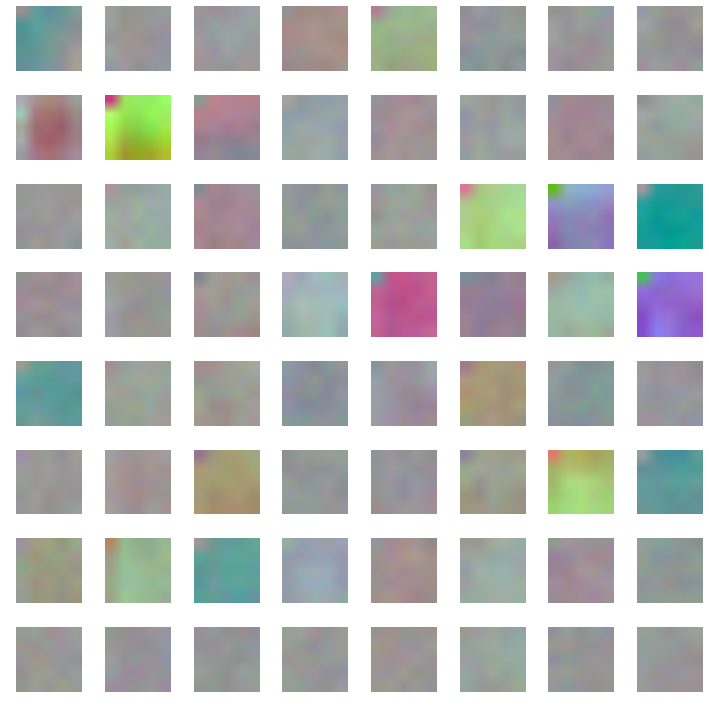

In [19]:
w, h = 8, 8 # w*h=64
k = 0
fig = plt.figure(figsize=(10, 10))
weights_ = weights.transpose((0, 2, 3, 1)).copy()
weights_ = (weights_ - weights_.min()) / (weights_.max() - weights_.min())
for i in range(w):
    for j in range(h):
        plt.subplot(w, h, k + 1)
        plt.imshow(weights_[k])
        plt.axis('off')
        k += 1
plt.tight_layout()
plt.show()